In [85]:
from astropy import units as u
imp = u.imperial
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
(13.95*imp.inch).cgs

<Quantity 35.433 cm>

In [11]:
def max_focal_length(epd, **kwargs):
    from astropy import units as u
    imp = u.imperial
    faring_height = kwargs.pop('faring_height',(82.7 * imp.inch).cgs)
    faring_radius = kwargs.pop('faring_radius', (13.95*imp.inch).cgs)
    bus_height = kwargs.pop('bus_height', 70*u.cm)
    fudge = kwargs.pop('fudge', 5*u.cm)
    
    faring_diameter = 2 * faring_radius

    bus_height = 70 * u.cm
    fudge = 5*u.cm

    telescope_height = (faring_height - bus_height - fudge - epd.to(u.cm)) # for 45-degree baffle
    focal_length = (telescope_height) * 0.5
    return focal_length


In [67]:
def max_epd(primary_diameter, **kwargs):
    from astropy import units as u
    imp = u.imperial
    
    faring_radius = kwargs.pop('faring_radius', (13.95*imp.inch).cgs)
    faring_diameter = faring_radius * 2.0
    faring_buffer = kwargs.pop('faring_buffer', 0.95)
    
    primary_buffer = kwargs.pop('primary_buff', 1.1)
    
    epd = faring_buffer * faring_diameter - primary_buffer * primary_diameter
    
    epd_limit = 0.5 * faring_buffer * faring_diameter
    epd[epd > epd_limit] = epd_limit

    return epd

    
    


In [70]:
primary_diameter = np.arange(200) / 10 + 20.
primary_diameter *= u.cm

epd = max_epd(primary_diameter)
focal_length = max_focal_length(epd)


<IPython.core.display.Javascript object>


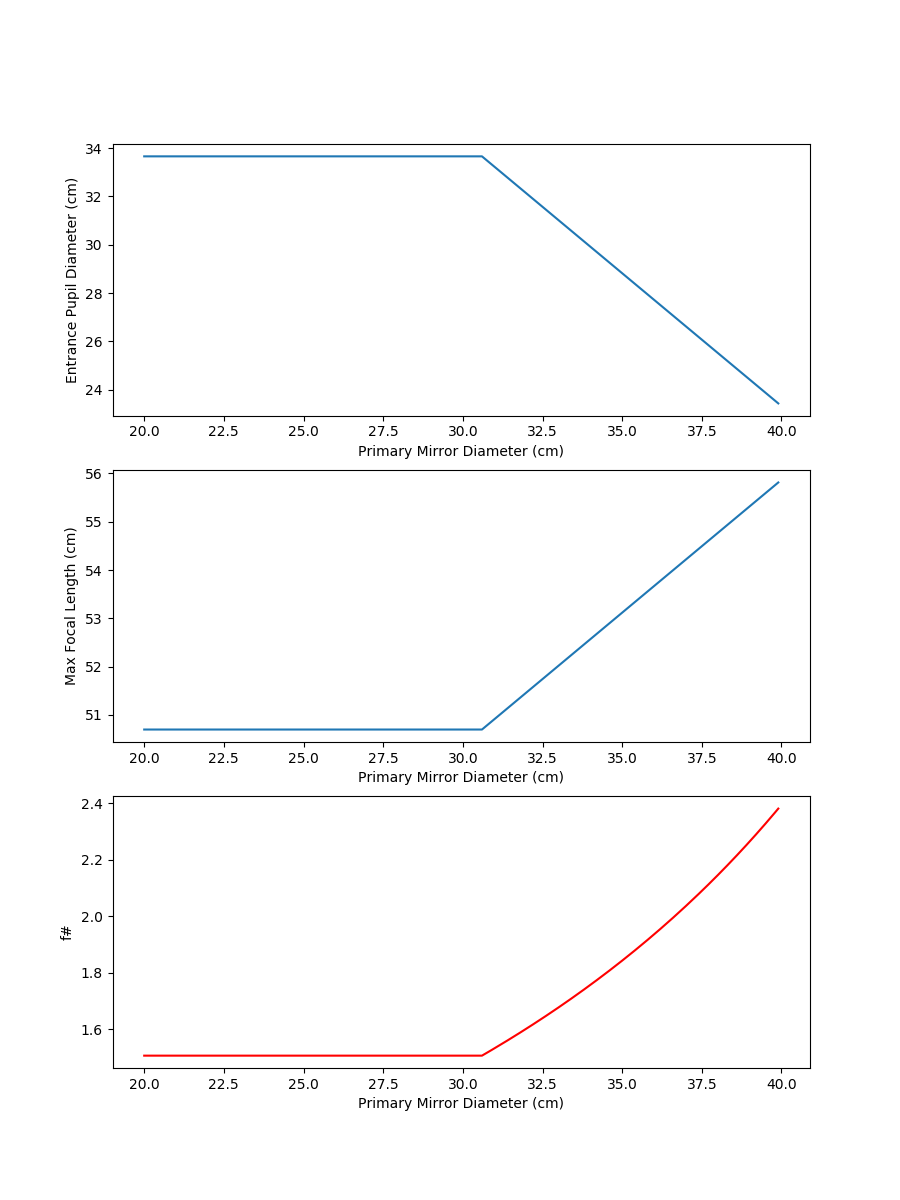

In [87]:
fig = plt.figure(figsize=(9, 12))
ax1 = fig.add_subplot(311)


ax1.plot(primary_diameter, epd)
ax1.set_xlabel('Primary Mirror Diameter (cm)')
ax1.set_ylabel('Entrance Pupil Diameter (cm)')

ax2 = fig.add_subplot(312)


# ax2 = ax1.twinx()
ax2.plot(primary_diameter, focal_length)
ax2.set_ylabel('Max Focal Length (cm)')
ax2.set_xlabel('Primary Mirror Diameter (cm)')


#ax2.ylabel('Max focal length')

ax3 = fig.add_subplot(313)
ax3.plot(primary_diameter, focal_length / epd, color='r')
ax3.set_xlabel('Primary Mirror Diameter (cm)')


ax3.set_ylabel('f#')


plt.show()

fig.savefig('foo.pdf')




In [114]:
primary_sc = 32.3*u.cm
epd_sc = max_epd(primary_sc, faring_buffer=0.95)
focal_length_sc = max_focal_length(epd_sc, bus_height=40*u.cm)
print('Primary Mirror {}:'.format(primary_sc))
print('Max EPD {}'.format(epd_sc))
print('Max Focal Length: {}'.format(focal_length_sc))

plate_scale = (206265 / focal_length_sc.to(u.mm)).to(1/u.micron)
print('Plate Scale {}'.format(plate_scale))

print()
print('Swiss Cross CMOS (10 micron pixels)')
# CMOS
pixel_size = 10*u.micron
pixel = pixel_size * plate_scale * u.arcsec
pixel_area = pixel**2
print('Pixel size {}'.format(pixel))
print('Pixel area: {}'.format(pixel_area))

pix_num = 6 * (4096*2048)
print('Total Pixels (6 each 2048 x 4096): {}'.format(pix_num))

sky_area = (pixel_area * pix_num).to(u.deg**2)
print('Sky area covered: {}'.format(sky_area))


print()
print('Swiss Cross CCD (13.5 micron pixels)')
# CMOS
pixel_size = 13.5*u.micron
pixel = pixel_size * plate_scale * u.arcsec
pixel_area = pixel**2
print('Pixel size {}'.format(pixel))
print('Pixel area: {}'.format(pixel_area))

print('Total Pixels (6 each 2048 x 4096): {}'.format(pix_num))

sky_area = (pixel_area * pix_num).to(u.deg**2)
print('Sky area covered: {}'.format(sky_area))


print()
print('6k x 6k CMOS (10 micron pixels)')
# CMOS
pixel_size = 10*u.micron
pixel = pixel_size * plate_scale * u.arcsec
pixel_area = pixel**2
print('Pixel size {}'.format(pixel))
print('Pixel area: {}'.format(pixel_area))

pix_num = 4 * (3072*3072)


print('Total Pixels (4 each 3072 x 3072): {}'.format(pix_num))

sky_area = (pixel_area * pix_num).to(u.deg**2)
print('Sky area covered: {}'.format(sky_area))



Primary Mirror 32.3 cm:
Max EPD 31.792699999999996 cm
Max Focal Length: 51.63265000000001 cm
Plate Scale 0.3994855968074464 1 / micron

Swiss Cross CMOS (10 micron pixels)
Pixel size 3.994855968074464 arcsec
Pixel area: 15.958874205660162 arcsec2
Total Pixels (6 each 2048 x 4096): 50331648
Sky area covered: 61.978120292867814 deg2

Swiss Cross CCD (13.5 micron pixels)
Pixel size 5.393055556900526 arcsec
Pixel area: 29.085048239815645 arcsec2
Total Pixels (6 each 2048 x 4096): 50331648
Sky area covered: 112.95512423375159 deg2

6k x 6k CMOS (10 micron pixels)
Pixel size 3.994855968074464 arcsec
Pixel area: 15.958874205660162 arcsec2
Total Pixels (4 each 3072 x 3072): 37748736
Sky area covered: 46.48359021965086 deg2


In [115]:
5.39**2

29.052099999999996